In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from denn import *

In [3]:
n = 100

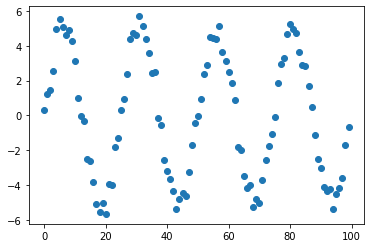

In [40]:
ab = np.linspace(0, 25, num=n)
ab = np.sin(ab)*5 + np.random.normal(scale=0.5, size=n)
plt.plot(ab, 'o')

In [43]:
D = 30
frequency = 1_000
max_times = n
total_generations = max_times * frequency + 1000

def fitness_func(indiv): return (indiv.data**2).sum()
def constraint_func(indiv, b): return -b + sum((1/np.sqrt(D))*indiv.data)

population = Population.new_random(dimension=D)
opt = Optimization(population, fitness_func, constraint_func, constraint_params=[ab],
                   max_times=max_times, frequency=frequency,
                   callbacks=[DynamicConstraint,OnChangeRestartPopulation])
opt.state_dict

{'gen': 0, 'evals': 0, 'time': 0, 'best': None}

A proper report should be shown here :)
Total time: 00:15


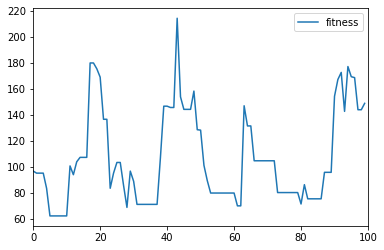

In [44]:
opt.run(total_generations)

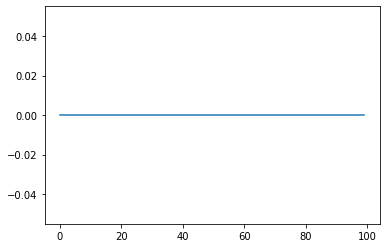

In [48]:
plt.plot([e.constraints_sum for e in opt.recorder.best_times]);

In [49]:
runs = (Optimization(population, fitness_func, constraint_func, constraint_params=[ab],
                     max_times=max_times, frequency=frequency, callbacks=[DynamicConstraint,OnChangeRestartPopulation])
        .create_multiple_runs(n_runs=20))

In [50]:
runs.run(total_generations)

Run cancelled: `max_time` reached.
Run cancelled: `max_time` reached.


Run cancelled: `max_time` reached.


Run cancelled: `max_time` reached.


Run cancelled: `max_time` reached.
Run cancelled: `max_time` reached.


Run cancelled: `max_time` reached.


Run cancelled: `max_time` reached.


Run cancelled: `max_time` reached.
Run cancelled: `max_time` reached.
Run cancelled: `max_time` reached.
Run cancelled: `max_time` reached.
Run cancelled: `max_time` reached.
Run cancelled: `max_time` reached.
Run cancelled: `max_time` reached.
Run cancelled: `max_time` reached.
Run cancelled: `max_time` reached.
Run cancelled: `max_time` reached.
Run cancelled: `max_time` reached.
Run cancelled: `max_time` reached.


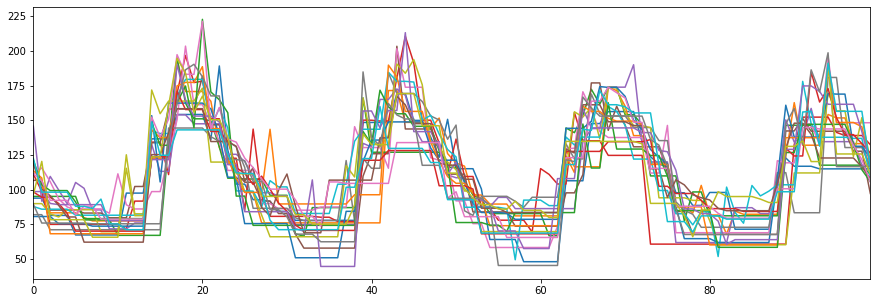

In [53]:
runs.times_data.plot(figsize=(15,5), legend=False);